# Сборный проект. Определение успешности игры. 

## Оглавление

1. [Задание](#step0)  
2. [Шаг 1. Открытие и изучение общей информации файла с данными](#step1)  
3. [Шаг 2. Подготовка данных](#step2)
4. [Шаг 3. Исследовательский анализ данных](#step3)
5. [Шаг 4. Определение пользователя каждого региона](#step4)  
6. [Шаг 5. Проверка гипотез](#step5)  
7. [Шаг 6. Общие выводы](#step6)  

### Задание <a id="step0"></a>   
Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


### Шаг 1. Откройте файлы с данными и изучите общую информацию <a id="step1"></a>  

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Откроем файлы с данными. Данные представлены в 1 таблице с именем 'games.csv'
games_data = pd.read_csv('4_project_data\\games.csv')

In [3]:
# Добавляем новую библиотеку и метод
from IPython.display import display
# Изучение вида и формата массива данных

display(games_data.info())
display(games_data.describe(include='all'))
display(games_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Описание данных:

### Вывод

Данные нуждаются в подготовке для полноценной работы с ними. Есть пустые значения в важных колонках (Name, Year_of_Release, Genre). Формат данных отдельных значений следует изменить с float на int для более удобного анализа, а это значит что необходимо провести предобработку данных для дальнейшего анализа.

### Шаг 2. Подготовка данных <a id="step2"></a>  


#### Задание :
* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
    + Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    + Опишите причины, которые могли привести к пропускам;
    + Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [4]:
# Приведем название столбцов к нижнему регистру
games_data.columns = games_data.columns.str.lower()

In [5]:
# Избавимся от пропуско данных в колонках. Для этого выведем данные о количестве пропусков в таблице.
for column in games_data.columns:
    print('пропусков в столбце', column, ':', games_data[column].isna().sum())

пропусков в столбце name : 2
пропусков в столбце platform : 0
пропусков в столбце year_of_release : 269
пропусков в столбце genre : 2
пропусков в столбце na_sales : 0
пропусков в столбце eu_sales : 0
пропусков в столбце jp_sales : 0
пропусков в столбце other_sales : 0
пропусков в столбце critic_score : 8578
пропусков в столбце user_score : 6701
пропусков в столбце rating : 6766


Видим, что количество пустых значений в колонках name, year_of_release и genre не велико, по-этому их удаление не повлияет на конечные выводы. Количество пустых значений в колонках critic_score, user_score, rating велико, по-этому их удаление, либо заполнение мединным или иным значением существенно повлияет на последующие вычисления  и выводы по данным.

In [6]:
# Проверим на наличие полных дубликатов. 
games_data.duplicated().sum()

0

Результат 0 - указывает на отсутствие дубликатов. 

In [7]:
# Удалим пропуски в колонках name, year_of_release и genre
for column in ['name', 'year_of_release', 'genre']:
    games_data = games_data[games_data[column].isna() == False]

In [8]:
# Переводим данные из float в int
for column in ['year_of_release']:
    games_data[column]=games_data[column].astype('int')

Преобразован формат данных в колонке 'year_of_release' в 'int'. Остальные колонки не требуют сейчас преобразования. Колонки с продажами должны оставаться в формате 'float', чтобы не потерять часть продаж. А колонки с оценками критиков и пользователей будут изменены в следующих частях работы.

Значение **"tbd"** встречается в колонке user_score, оно означает "to be determined", то есть оценка еще не высталена. Удалим данные значения из таблицы для упращения дальнейшей обработки.

In [9]:
games_data = games_data[games_data.user_score != 'tbd']

In [10]:
# Посчитаем суммарные продажи во всех регионах и добавим в колонку total_sales
games_data['total_sales'] = games_data.na_sales + games_data.eu_sales + games_data.jp_sales + games_data.other_sales
# Выведем получившуюся таблицу на экран
games_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


После 2 шага из данных частично были убраны пустые значения, изменен формат записи данных с информацией года выпуска игр и добавлена инфомарция по полным продажам каждой игры.

In [11]:
# Изменим тип данных колонок user_score на float
games_data.user_score = games_data.user_score.astype(float)

### Вывод

Из данных были частично убраны пустые значения, изменен формат записи данных с информацией года выпуска игр и добавлена инфомарция по полным продажам каждой игры.

### Шаг 3. Исследовательский анализ данных <a id="step3"> </a>

#### Задание : 
* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [12]:
#Выведем сгрупированную по годам и количеству игр таблицу
games_data.groupby(['year_of_release']).agg({'year_of_release' : 'count'}) \
    .rename(columns={'year_of_release': 'amount'})

,amount
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<AxesSubplot:ylabel='Frequency'>

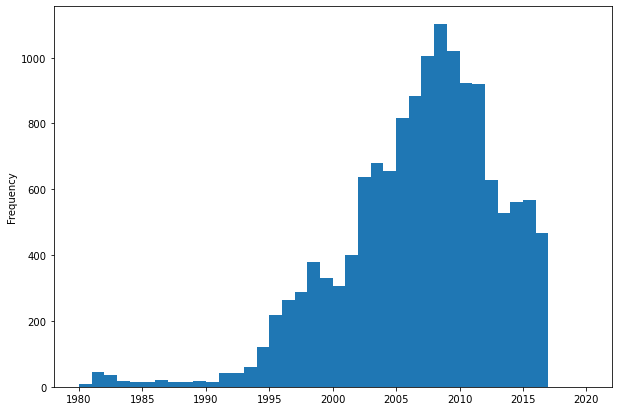

In [13]:
# Для оценки данных построим график распределения 

#plt.xlim(1980,2020)
#plt.ylim(0,2000)
plt.figure(figsize=(10, 7))
games_data['year_of_release'].plot(kind='hist', range=(1980, 2020), bins=40)

Пик по выпуску игр пришелся на конец нулевых годов. Затем произошло значительное снижение по их выпуску. Данные за все периоды не нужна, так как на нынешнее положение дел в продажах игр влияют только последние годы.

* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [14]:
# Создадим новую таблицу и сгруппируем по выручке платформы в год. Результат отсортируем по убыванию
income_per_platform = games_data.groupby(['platform'], as_index=False).agg({'total_sales' : 'sum'}) \
.sort_values(by='total_sales', ascending=False)

# Выведем топ - 10 на экран
income_per_platform.head(10)


,platform,total_sales
16,PS2,1171.19
28,X360,948.74
17,PS3,921.09
26,Wii,791.91
15,PS,714.26
4,DS,655.36
18,PS4,314.00
19,PSP,273.11
6,GBA,263.70
5,GB,254.43


In [15]:
#Сохраним в таблице games_data_top_10_platforms данные из 10 самых успешных платформ, полученных ранее. 

games_data_top_10_platforms = games_data.query('platform in @income_per_platform.head(10).platform').copy()

<AxesSubplot:title={'center':'Top 10 sales'}, xlabel='year_of_release'>

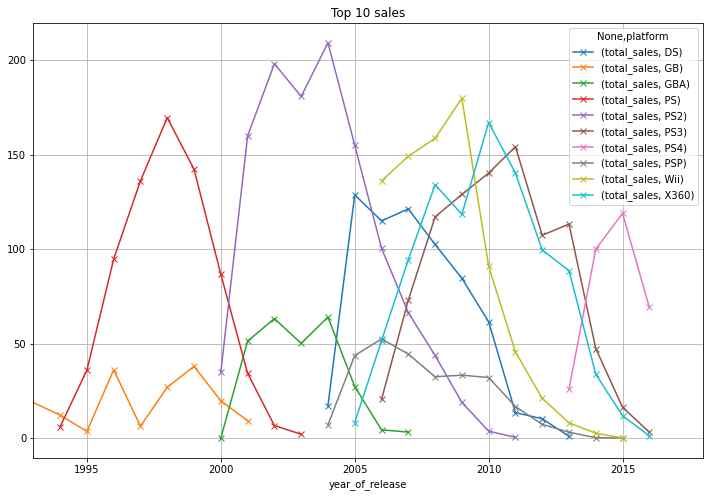

In [16]:
# Сгруппируем и построим график по 10 самым успешным платформам
top_10_platforms_grouped = games_data_top_10_platforms.groupby(['year_of_release', 'platform'])[['total_sales']].sum()
top_10_platforms_grouped.unstack().plot(figsize = (12,8), title = 'Top 10 sales', style = '-x', xlim=(1993,2018), grid=1)

Были отобраны 10 платформ с самыми высокими показателями по продажам, построен график распределения по годам. По графику видно, что в среднем платформы "живут" 10 лет.

* Возьмите данные за соответствующий актуальный период

In [17]:
actual_period = games_data.query('year_of_release >= 2007')

Актуальным можно считать периаодн с 2007г.Так в рассмотрение попадут только последние поколения платформ.

* Не учитывайте в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [18]:
# Создадим сводную таблицу платформ по годам со значением суммы выручки
platforms_last_years_pivot = actual_period \
.pivot_table(index='platform', columns = 'year_of_release', values='total_sales', aggfunc=['sum']) 

#Для анализа оставим  только данные за последние 3 года
platforms_last_years_pivot.drop(axis=1, columns=platforms_last_years_pivot.columns[[0,1,2,3,4,5,6]], inplace=True)
# Удалим пустые строки, отсортируем по убыванию выручки за 2016 год и выведем результат
platforms_last_years_pivot.dropna().sort_values(by=platforms_last_years_pivot.columns[2], ascending=False)

sum               
year_of_release    2014    2015   2016
platform                              
PS4              100.00  118.86  69.15
XOne              54.07   59.92  25.82
3DS               43.07   27.21  15.10
PC                13.25    8.49   5.22
WiiU              22.01   16.27   4.30
PSV               11.90    5.95   4.24
PS3               47.40   16.30   3.16
X360              33.77   11.87   1.22

Лидирует по продажам PS4. Ростут PS4 и XOne. Падуют остальные. PS4 и XOne потенциально прибыльные платформы.

* Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

In [19]:
#Предварительно сохраним в переменной top_10_platform_since_actual_period список топ-10 платформ по продажам за актуальный период.

top_10_platform_since_actual_period = actual_period.groupby(['platform'], as_index=False).agg({'total_sales' : 'sum'}) \
.sort_values(by='total_sales', ascending=False).head(10).platform

(0.0, 2.0)

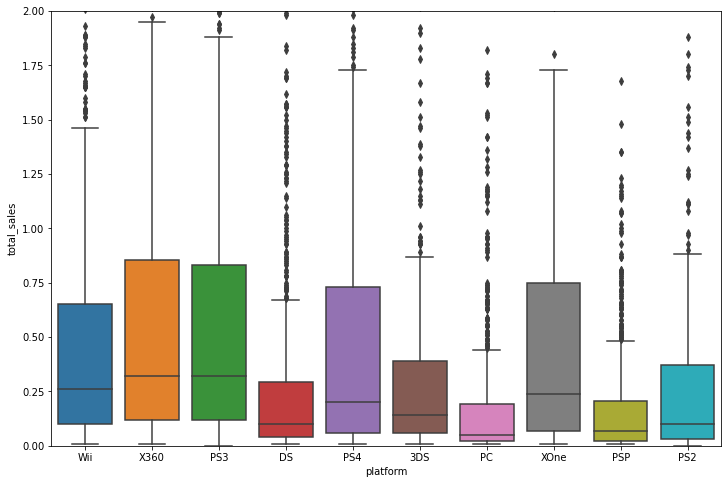

In [20]:
# Оставляем для анализа только топ-10 продаваемых платформ за актуальный период
platforms_top_boxplot = actual_period.query('platform in @top_10_platform_since_actual_period').copy()

# Построим график «ящик с усами»
plt.figure(figsize = (12,8))
sns.boxplot(x="platform", y="total_sales", data=platforms_top_boxplot)
plt.ylim([0,2])

In [21]:
# Получим таблицу сгруппированную по платформам 
platforms_mean = platforms_top_boxplot.pivot_table(index='platform', values='total_sales', aggfunc=['median', 'mean', 'count'])

# Переименуем столбцы
platforms_mean.columns = ['медианная_выручка', 'средняя_выручка', 'кол-во_игр']

# Анализируем выручку
platforms_mean.sort_values(by='средняя_выручка', ascending=False)

,медианная_выручка,средняя_выручка,кол-во_игр
platform,,,
X360,0.32,0.855573,1039
PS4,0.20,0.813472,386
Wii,0.26,0.802742,817
PS3,0.32,0.754929,1193
XOne,0.24,0.672754,236
3DS,0.14,0.552926,458
DS,0.10,0.362925,1087
PS2,0.10,0.302682,440
PC,0.05,0.233912,680


По общему кол-ву игр выделяются платформы X360, PS3 и Wii. Явными лидерами по медианной выручке являются X360 и PS3. Средине продажи по платформам распределены более равномерно чем медиана. Так, в топ попала платформа PS4, которая не является лидером по кол-ву игр и медианной выручке.

* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Для анализа взял показатели "PS3".

In [22]:
# Создадим отдельную таблицу для анализа и уберем из нее пустые значения в колонках critic_score и user_score 
actual_period_corr_all = actual_period
actual_period_corr_all = actual_period_corr_all[actual_period_corr_all['critic_score'].isna() == False]
actual_period_corr_all = actual_period_corr_all[actual_period_corr_all['user_score'].isna() == False]

# Для анализа отфильтруем по платформе PS3
actual_period_corr_ps3 = actual_period_corr_all.query('platform == "PS3"')

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

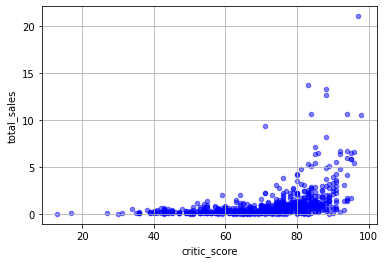

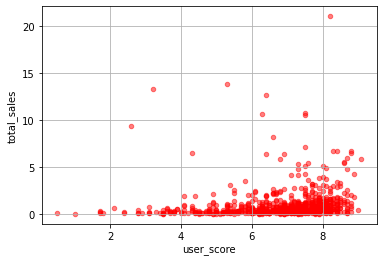

In [23]:
# Построим диаграмму рассеяния по таблице actual_period_corr_ps3

actual_period_corr_ps3.plot(y='total_sales', x='critic_score', kind='scatter', color='blue', alpha = 0.5, grid=1)
actual_period_corr_ps3.plot(y='total_sales', x='user_score', kind='scatter', color='red', alpha = 0.5, grid=1)

In [24]:
# Посчитаем корреляцию 
for column in ['critic_score', 'user_score']:
    print(column, '=', actual_period_corr_ps3['total_sales'].corr(actual_period_corr_ps3[column]))

critic_score = 0.4284472591344223
user_score = 0.14154093147174013


Исходя из полученных данных можно сделать вывод, что оценки критиков имеют сильную прямую корреляцию с продажами, а  оценки покупателей имеют слабую корреляцию с продажами.

* Соотнесите выводы с продажами игр на других платформах. 

Чем выше оценки критиков, тем выше продажи. А оценки пользователей не сильно влияют на итоговые показатели продаж.

In [25]:
# В таблице platforms_top_boxplot у нас сохранены данные по топ-10 продаваемых платформ 
# за актуальный период, для анализа возьмем её

# Создадим таблицу сгрупированную по платформам
platforms_top_score = platforms_top_boxplot.pivot_table(index='platform', values=['critic_score', 'total_sales'], aggfunc=['median'])
# Переименуем столбцы
platforms_top_score.columns = ['медианная_оценка','медианная_выручка']
# Отсортируем по убыванию колонку медианная_оценка 
platforms_top_score.sort_values(by='медианная_оценка', ascending=False)

,медианная_оценка,медианная_выручка
platform,,
PC,76.0,0.05
XOne,76.0,0.24
PS3,73.5,0.32
PS4,73.5,0.20
X360,72.0,0.32
DS,70.0,0.10
PSP,70.0,0.07
3DS,69.0,0.14
PS2,68.0,0.10


In [56]:
# Создадим отдельные таблицы отфильтрованные по платформам PC и X360 соответственно
actual_period_corr_PC = actual_period_corr_all.query('platform == "PC"').copy()
actual_period_corr_X360 = actual_period_corr_all.query('platform == "X360"').copy()


Для анализа возьмем платформы PC и X360, как лидирующие по медианным показателям выручки и оценки критиков

In [60]:
# Посчитаем корреляцию для платформы PC
for column in ['critic_score', 'user_score']:
    print(column, '=', actual_period_corr_PC['total_sales'].corr(actual_period_corr_PC[column]))

critic_score = 0.2981067816970222
user_score = -0.008355359686047217


In [61]:
# Посчитаем корреляцию для платформы X360
for column in ['critic_score', 'user_score']:
    print(column, '=', actual_period_corr_X360['total_sales'].corr(actual_period_corr_X360[column]))

critic_score = 0.39268162747291496
user_score = 0.10969763634443419


Анализ значений платформ PC и X360 показывает, взаимосвязь оценок критиков и пользователей с продажами по своей природе не отличаются.

* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [87]:
# Сгрупируем по жанрам игр и узнаем их количество
actual_period.groupby(by="genre").name.count().sort_values(ascending=False)

genre
Action          1952
Sports           879
Role-Playing     864
Adventure        820
Misc             796
Shooter          623
Racing           386
Fighting         340
Simulation       332
Strategy         324
Platform         239
Puzzle           169
Name: name, dtype: int64

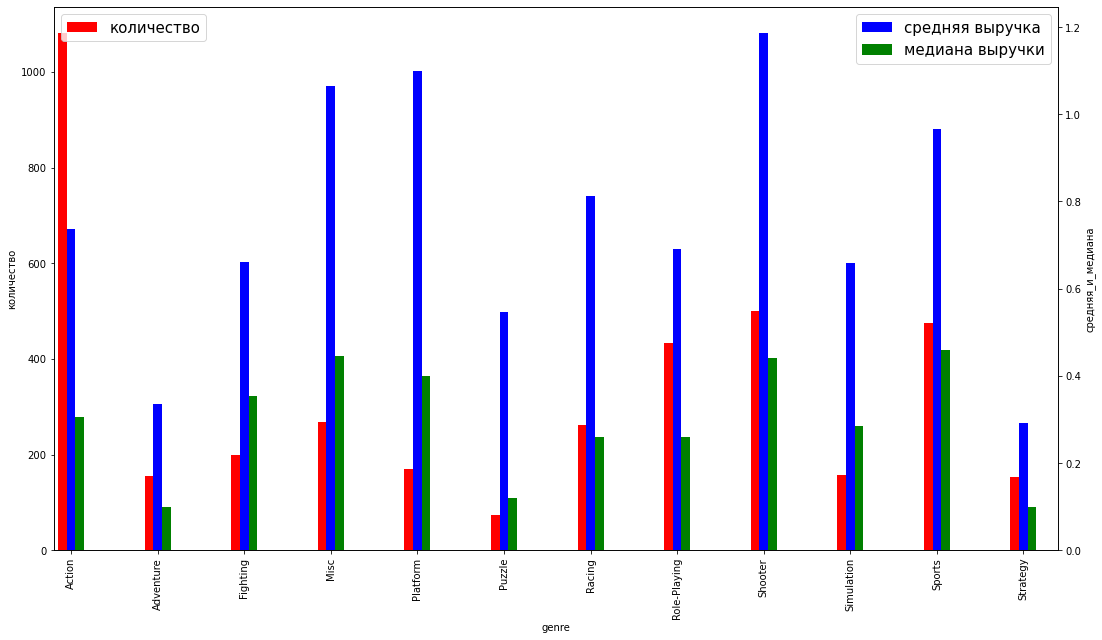

In [174]:
# Для более детального анализа построим гистограмму по кол-ву игр, средним и медианным продажам по каждому жанру

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot()
ax2 = ax.twinx()

width = 0.1
(actual_period_corr_all.pivot_table(index = 'genre',values = 'total_sales',aggfunc = 'count')
 .total_sales.plot(kind='bar', color='red', ax=ax, width=width, position=1.5, label = 'количество'))

(actual_period_corr_all.pivot_table(index = 'genre',values = 'total_sales',aggfunc = 'mean')
 .total_sales.plot(kind='bar', color='blue', ax=ax2, width=width, position=0.5, label = 'средняя выручка'))

(actual_period_corr_all.pivot_table(index = 'genre',values = 'total_sales',aggfunc = 'median')
 .total_sales.plot(kind='bar', color='green', ax=ax2, width=width, position=-0.5, label = 'медиана выручки'))

ax.set_ylabel('количество')
ax2.set_ylabel('средняя_и_медиана')

ax.legend(prop={'size': 15}, loc = 2)
ax2.legend(prop={'size': 15}, loc = 1)

plt.show()


Самая популярный жанр среди игр является 'Action'. Жанрами с самыми высокими показателями медианной выручки являются Sports и Shooters. Жанрами с самыми низкими показателями медианной выручки являются Strategy, Puzzle и Adventure. 

Судя по всем исследованиям, которые были проведены в данном шаге, можно прийти к заключению, что средняя продолжительность жизни платформы равна 10 лет, а самыми популярными и прибыльными платформами за этот период были X360, PS3, PS4 и WiiU. А самыми прибыльными жанрами для разработчиков являются Sports и Shooters.

### Шаг 4. Определение пользователя каждого региона <a id="step4"> </a>

#### Задание :
Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?
    

In [161]:
# Топ-5 самых популярных платформ для регионов NA, EU, JP
# Создадим необходимые сводные таблицы через цикл.  
for region_id in ['na','eu','jp']:
# Создадим сводную таблицу с групировкорй по строкам где были продажи в регионах     
    top_5_platform = actual_period.query(region_id + '_sales > 0').\
        pivot_table(index='platform', values =[region_id + '_sales'], aggfunc= ['count','sum'])
# Для удобства переименуем колонки 
    top_5_platform.columns = ['Количество игр','Выручка']
# Добавим в таблицу колонку с рачетом доли выручки в % от общей суммы выручки по региону
    top_5_platform['Доля, %'] = (top_5_platform['Выручка'] * 100 / actual_period[region_id + '_sales'].sum()).astype(int)
# Выведем полученную таблицу на экран    
    print('Топ-5 популярных платформ для региона',region_id, ':')
    display(top_5_platform.sort_values(by='Выручка', ascending=False).head())

Топ-5 популярных платформ для региона na :


,Количество игр,Выручка,"Доля, %"
platform,,,
X360,942,543.83,28
PS3,903,375.27,19
Wii,666,342.88,17
DS,582,177.30,9
PS4,288,108.62,5


Топ-5 популярных платформ для региона eu :


,Количество игр,Выручка,"Доля, %"
platform,,,
PS3,874,317.62,24
X360,855,255.48,19
Wii,525,197.70,15
PS4,290,141.09,10
PC,640,97.33,7


Топ-5 популярных платформ для региона jp :


,Количество игр,Выручка,"Доля, %"
platform,,,
DS,560,100.80,20
3DS,352,100.39,20
PS3,677,77.96,16
PSP,655,65.95,13
Wii,240,58.70,12


Самая успешная платформа в NA X360 с 28% долей рынка с 9% отрывом от второй PS3, 
в EU лидер PS3 в 24% долей рынка с 5% отрывом от второй X360, 
в JP лидируют DS и 3DS c 20% долей рынка каждый и отрывом от PS3 в 4%. 

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные жанры (топ-5). Поясните разницу.

In [162]:
# Топ-5 самых популярных жанров для регионов NA, EU, JP
# Создадим необходимые сводные таблицы через цикл.  
for region_id in ['na','eu','jp']:
# Создадим сводную таблицу с групировкорй по строкам где были продажи в регионах     
    table_name = actual_period.query(region_id + '_sales > 0').\
        pivot_table(index='genre', values =[region_id + '_sales'], aggfunc= ['count','sum'])
# Для удобства переименуем колонки 
    table_name.columns = ['Количество игр','Выручка']
# Добавим в таблицу колонку с рачетом доли выручки в % от общей суммы выручки по региону
    table_name['Доля, %'] = (table_name['Выручка'] * 100 / actual_period[region_id + '_sales'].sum()).astype(int)
# Выведем полученную таблицу на экран    
    print('Топ-5 популярных жанров для региона',region_id, ':')
    display(table_name.sort_values(by='Выручка', ascending=False).head())


Топ-5 популярных жанров для региона na :


,Количество игр,Выручка,"Доля, %"
genre,,,
Action,1340,463.15,24
Shooter,547,347.27,18
Sports,634,285.64,14
Misc,437,207.41,10
Role-Playing,475,173.33,9


Топ-5 популярных жанров для региона eu :


,Количество игр,Выручка,"Доля, %"
genre,,,
Action,1315,325.49,25
Shooter,522,229.79,17
Sports,557,200.64,15
Misc,413,113.03,8
Racing,312,102.43,7


Топ-5 популярных жанров для региона jp :


,Количество игр,Выручка,"Доля, %"
genre,,,
Role-Playing,681,150.21,31
Action,909,95.04,19
Misc,330,48.32,9
Sports,273,39.63,8
Adventure,590,26.71,5


Самый успешный жанр в NA Action с 24% долей рынка и с 6% отрывом от второй Shooter, 
в EU лидер Action с 25% долей рынка и с 8% отрывом от второй Shooter, 
в JP лидируют Role-Playing с 31% долей рынка и отрывом от Action в 12%.

Популярность тех или иных жанров в регионах могла сложить из исторических предпочтений. А популярность платформ зависит от того, как они лучше всего подходят для тех игр, которые популярны для данного региона.

Определите для пользователя каждого региона (NA, EU, JP):
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

«EC» — «Для детей младшего возраста», «E» — «Для всех», «E10+» — «Для всех от 10 лет и старше», «T» — «Подросткам», «M» — «Для взрослых», «RP» — «Рейтинг ожидается».

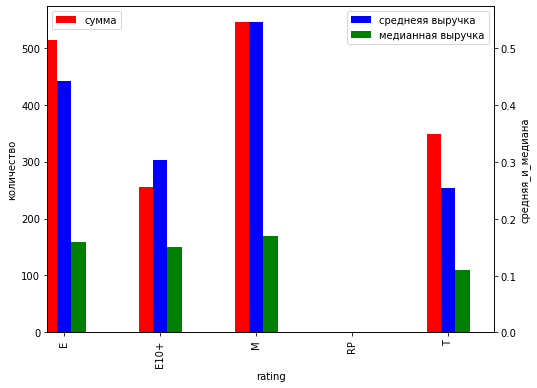

In [173]:
# Создадим таблицу в которой нет пустых значений в колонке рейтинга "rating" 
actual_period_rating = actual_period[actual_period.rating.isna() == False].copy()
# Построим распределение рейтингов и выручки внутри NA региона
fig = plt.figure()  # Create matplotlib figure
ax = fig.add_subplot() # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.15
(actual_period_rating.pivot_table(index = 'rating',values = 'na_sales',aggfunc = 'sum')
 .na_sales.plot(kind='bar', color='red', ax=ax, width=width, 
                position=1.5, figsize=(8, 6), label = 'сумма'))

(actual_period_rating.pivot_table(index = 'rating',values = 'na_sales',aggfunc = 'mean')
 .na_sales.plot(kind='bar', color='blue', ax=ax2, width=width, 
                position=0.5, figsize=(8, 6), label = 'среднеяя выручка'))

(actual_period_rating.pivot_table(index = 'rating',values = 'na_sales',aggfunc = 'median')
 .na_sales.plot(kind='bar', color='green', ax=ax2, width=width, 
                position=-0.5, figsize=(8, 6), label = 'медианная выручка'))

ax.set_ylabel('количество')
ax2.set_ylabel('средняя_и_медиана')

ax.legend(prop={'size': 10}, loc = 2)
ax2.legend(prop={'size': 10}, loc = 1)

plt.show()

Продаж игр с оценкой RP нет, так как без определенного возрастного рейтинга игра не выйдет. В основном игры делаются с рейтингм М и Е, чтобы основная платежеспособная часть населения была заинтересована в покупке игры, хоть у рейтинга ЕС самая высокая медианная выручка.

В каждом отдельном регионе предпочтения потребителей отличают по жанрам и по платформам в виду сложившихся покупательских предпочтений. 

### Шаг 5. Проверка гипотез <a id="step5"> </a>

### Задание :
Проверьте гипотезы

    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.
Поясните:

    Как вы сформулировали нулевую и альтернативную гипотезы;
    Какой критерий применили для проверки гипотез и почему.

№1 Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза средние пользовательские рейтинги платформ Xbox One и PC не равны. Пороговое значение alpha равно 5%.

In [182]:
# Создадим таблицу без нулевых значений в колонке user_score, для дальнейшей проверки гипотезы 
actual_period_user = actual_period[actual_period['user_score'].isna()==False]

In [183]:
# Проверка гипотезы - средняя оценка Xbox One и PC одинаковые
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(actual_period_user.query('platform == "XOne"')['user_score'], 
                       actual_period_user.query('platform == "PC"')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.05554752084307562
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу не удалось опровергнуть. Утверждать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые нельзя.

№2 Нулевая гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. Альтернативная гипотеза средние пользовательские рейтинги жанров Action и Sports не равны. Пороговое значение alpha равно 5%.

In [186]:
# Проверка гипотезы - средняя оценка Action и Sports одинаковые
from scipy import stats as st
import pandas as pd

alpha = 0.05

results = st.ttest_ind(actual_period_user.query('genre == "Action"')['user_score'], 
                       actual_period_user.query('genre == "Sports"')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0894514919563483e-12
Отвергаем нулевую гипотезу


In [194]:
# Посчитаекм среднюю оценку пользователей
action_score_mean = actual_period_user.query('genre == "Action"')['user_score'].mean()
sport_score_mean = actual_period_user.query('genre == "Sports"')['user_score'].mean()

display(action_score_mean, sport_score_mean)

6.836079077429997

6.307979626485568

Нулевая гипотеза отвергнута. Средние рейтинги пользователей жанра Action выше чем у Sports.

H₀ сформулировал так, чтобы использовать знак равенства при сравнении показателей. Использовал t-критерий так как его лучше использовать для проверки равенства средних значений в двух выборках.

### Шаг 6. Общий вывод<a id="step6"></a>  

Изначально был предобработан первоначальный датасет. Изменены форматы записи и форматы числовых данных, удалены пустые строки, которые не повлияли на дальнейшие подсчеты. 

Подсчитна выручка по каждой игре во всех регионе.

Визулизированы данные с помощью диаграмм рассеяния, графиков и гистограм.

Выбор платформы, на которой будет сделана ига, зависит от жанра игры и предпочтений покупателей, на которых ориентируется комания, так как в регионах NA, EU, JP сильно отличаются предпочтения покупателей.

Самыми популярными жанрами игр оказались Action,  Sports и Role-Playing. Самыми популярными платформами стали X360, PS3, PS4,  WiiU и DS. 

Оценки критиков сильно коррелируют с итоговыми продажами игр, а оценки пользователей не влияют на продажи.